# **Práctica 3 : Análisis de Señales ECG**



*   Antonia Yepes Quintero - 1036960061
*   Isabella Bedoya Orozco - 1001013873



In [2]:
import numpy as np
import scipy.io as sio
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [22]:
data = sio.loadmat ('/content/drive/MyDrive/Bioseñales/Práctica 3/signals.mat')
print(data)
ecg_filtrada = data['ECG_filtered'].flatten()
ecg_cruda = data['ECG_asRecording'].flatten()


{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Mon Apr 20 15:20:29 2015', '__version__': '1.0', '__globals__': [], 'Fs': array([[1024]], dtype=uint16), 'ECG_asRecording': array([[3904.31689453, 3939.203125  , 3976.00683594, ..., 4366.41064453,
        4365.31103516, 4370.91796875]]), 'ECG_filtered': array([[ 8.87103896e-03,  5.62737497e+01,  8.57077127e+01, ...,
        -1.20952610e+02, -1.31734356e+02, -1.32898021e+02]]), 'EMG_filtered1': array([[ 17.65905117,  19.41391578,  18.89666666, ..., 242.49414224,
        220.4135886 , 151.5810508 ]]), 'EMG_filtered2': array([[  21.1780547 ,  -79.82418538, -133.65960989, ..., -384.58994036,
        -539.9349533 , -772.65519631]]), 'EMG_asRecording1': array([[ 908.07531738,  903.17706299,  896.62982178, ..., 1433.91882324,
        1416.109375  , 1352.75012207]]), 'EMG_asRecording2': array([[-3109.97558594, -3231.01391602, -3302.34960938, ...,
        -3791.24267578, -3924.6550293 , -4109.94433594]])}


Creación de la función RMS:

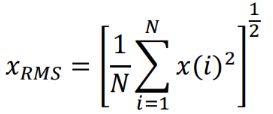

In [5]:
def calcular_rms(signal):
  N = len(signal)
  valor_rms = np.sqrt(np.sum(signal**2)/N)
  return valor_rms

Se crea el vector de tiempo de la señal cruda:

In [20]:
Fs = 1024  # Frecuencia de muestreo en Hz
T = 1 / Fs
muestras = (ecg_cruda.size)
t = np.arange(0,muestras*T, T)
print(t)

[0.00000000e+00 9.76562500e-04 1.95312500e-03 ... 2.99970703e+01
 2.99980469e+01 2.99990234e+01]


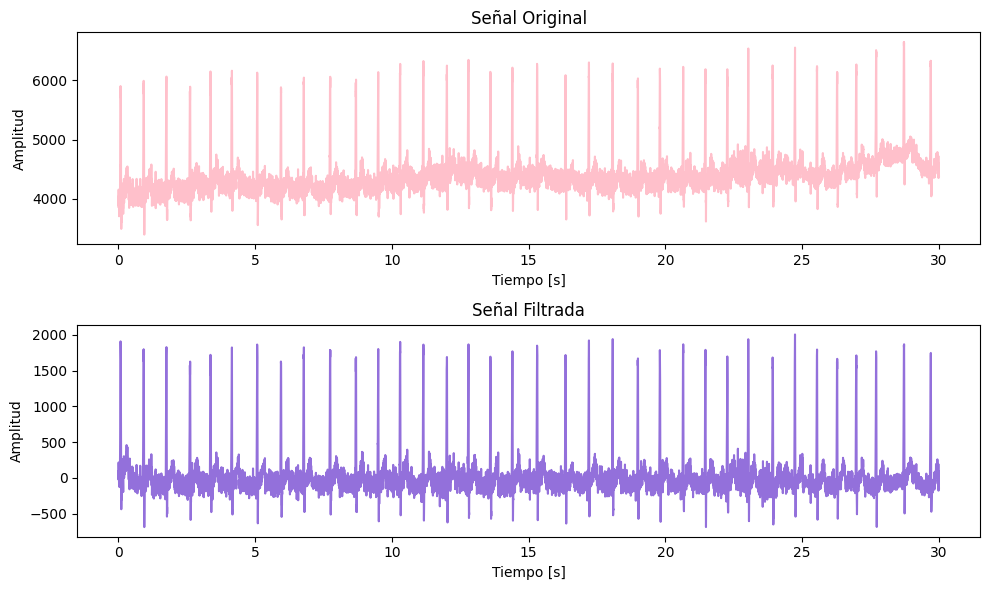

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize = (10,6))
plt.subplot(2, 1, 1)
plt.plot(t,ecg_cruda, color = 'pink')
plt.title('Señal Original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')

plt.subplot(2, 1, 2)
plt.plot(t,ecg_filtrada, color = 'mediumpurple')
plt.title('Señal Filtrada')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.tight_layout()
plt.show()


**Observaciones:**

Se observa un desplazamiento (offset) en la señal original, junto con una mayor presencia de ruido en comparación con la señal filtrada. Además, en la adquisición de una señal de ECG, el gráfico puede aparecer distorsionado debido a la captura simultánea de diferentes tipos de señales. Para mitigar este tipo de distorsiones, se aplican filtros digitales como una solución efectiva.